In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv('tips.csv')


In [18]:
data.isnull().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [19]:
data.isnull().mean()

Unnamed: 0    0.000000
total_bill    0.159836
tip           0.000000
sex           0.000000
smoker        0.000000
day           0.000000
time          0.000000
size          0.000000
dtype: float64

In [20]:
data['total_bill'].mean()

21.36019512195122

In [21]:
#1.Read the tips dataset from the provided source only. Handle the missing values with the appropriate techniques.
data['total_bill']=data['total_bill'].fillna(data['total_bill'].mean())

In [22]:
data.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,Female,No,Sun,Dinner,2
1,1,21.360195,1.66,Male,No,Sun,Dinner,3
2,2,21.010000,3.50,Male,No,Sun,Dinner,3
3,3,23.680000,3.31,Male,No,Sun,Dinner,2
4,4,24.590000,3.61,Female,No,Sun,Dinner,4


In [23]:
#2.Handle the categorical data in the tips dataset with the relevant approaches such as label-encoding, one hot encoding, ordinal encoding.
onehot= pd.get_dummies(data, columns = ['sex','smoker','day','time']) 

In [24]:
onehot.head(5)

,Unnamed: 0,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,0,16.990000,1.01,2,True,False,True,False,False,False,True,False,True,False
1,1,21.360195,1.66,3,False,True,True,False,False,False,True,False,True,False
2,2,21.010000,3.50,3,False,True,True,False,False,False,True,False,True,False
3,3,23.680000,3.31,2,False,True,True,False,False,False,True,False,True,False
4,4,24.590000,3.61,4,True,False,True,False,False,False,True,False,True,False


In [25]:
#3. Perform feature scaling techniques such as min-max normalization, standardization, z-score, on the tips dataset.
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
df_m=m.fit_transform(data[['total_bill','tip']])
d=pd.DataFrame(df_m,columns=['total_bill','tip'])
d.sample(5)

,total_bill,tip
173,0.602849,0.242222
129,0.413699,0.131111
131,0.360285,0.203333
147,0.383121,0.070000
237,0.623377,0.018889


(array([ 1.,  1., 10.,  5.,  0., 21., 27., 30., 15., 58., 14., 13.,  8.,
         7.,  8.,  5.,  6.,  1.,  3.,  4.,  1.,  1.,  1.,  3.,  1.]),
 array([ 3.07  ,  4.9796,  6.8892,  8.7988, 10.7084, 12.618 , 14.5276,
        16.4372, 18.3468, 20.2564, 22.166 , 24.0756, 25.9852, 27.8948,
        29.8044, 31.714 , 33.6236, 35.5332, 37.4428, 39.3524, 41.262 ,
        43.1716, 45.0812, 46.9908, 48.9004, 50.81  ]),
 <BarContainer object of 25 artists>)

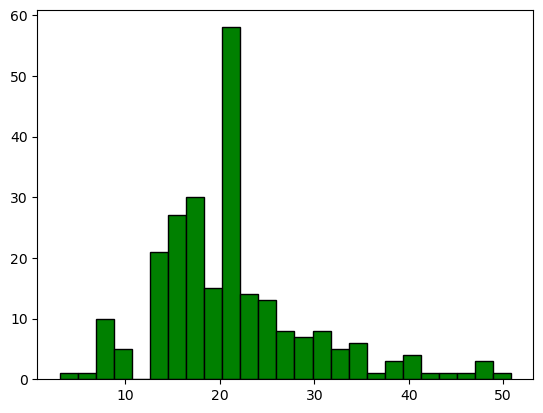

In [26]:
plt.hist(data['total_bill'],bins=25,color='green',edgecolor='black')

In [28]:
#standardization
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df_s=s.fit_transform(data[['total_bill','tip']])
df_s

array([[-5.38971741e-01, -1.43994695e+00],
       [ 0.00000000e+00, -9.69205340e-01],
       [-4.31892099e-02,  3.63355539e-01],
       [ 2.86099188e-01,  2.25754144e-01],
       [ 3.98328567e-01,  4.43019505e-01],
       [ 4.84658858e-01,  1.23965916e+00],
       [-1.55273602e+00, -7.22971264e-01],
       [ 6.80751949e-01,  8.81527488e-02],
       [-7.79463267e-01, -7.51939979e-01],
       [-8.11528804e-01,  1.67816714e-01],
       [ 0.00000000e+00, -9.32994446e-01],
       [ 1.71424887e+00,  1.44968234e+00],
       [-7.32598252e-01, -1.03438495e+00],
       [-3.61377999e-01,  1.24660453e-03],
       [-8.05362355e-01,  1.57309619e-02],
       [ 2.71083131e-02,  6.67527044e-01],
       [ 0.00000000e+00, -9.61963161e-01],
       [-6.25302033e-01,  5.15441291e-01],
       [-5.41438321e-01,  3.63355539e-01],
       [-8.75876456e-02,  2.54722859e-01],
       [-4.24275782e-01,  7.83401903e-01],
       [-1.31986081e-01, -1.79807863e-01],
       [-6.89433106e-01, -5.56401155e-01],
       [ 2.

In [13]:
d.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,NaN,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
z=(d['total_bill']-d['total_bill'].mean())/d['total_bill'].std()
z.head(5)


0   -5.378662e-01
1   -3.261640e-16
2   -4.310062e-02
3    2.855123e-01
4    3.975115e-01
Name: total_bill, dtype: float64

In [31]:
#4. Create a new feature representing the average tip percentage for each dining party size.
d.head(5)

,total_bill,tip
0,0.291579,0.001111
1,0.383121,0.073333
2,0.375786,0.277778
3,0.431713,0.256667
4,0.450775,0.290000


In [19]:
data['avg_tip']=data.groupby('size')['tip'].transform('mean')
data.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,avg_tip
0,0,16.990000,1.01,Female,No,Sun,Dinner,2,2.582308
1,1,21.360195,1.66,Male,No,Sun,Dinner,3,3.393158
2,2,21.010000,3.50,Male,No,Sun,Dinner,3,3.393158
3,3,23.680000,3.31,Male,No,Sun,Dinner,2,2.582308
4,4,24.590000,3.61,Female,No,Sun,Dinner,4,4.135405


In [21]:
#5. Create a new feature based on total bill and tips if total bill is greater than 10$ and tips is greater than 3$ mark as Highest-bills-with-tips otherwise Normal-bills
def categorize(total_bill,tip):
    if total_bill>10 and tip>3:
        return 'Highest-bills-with-tips'
    else:
        return 'Normal-bills'
data['bill_category']=data.apply(lambda row:categorize(row['total_bill'],row['tip']),axis=1)
data.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,avg_tip,bill_category
0,0,16.990000,1.01,Female,No,Sun,Dinner,2,2.582308,Normal-bills
1,1,21.360195,1.66,Male,No,Sun,Dinner,3,3.393158,Normal-bills
2,2,21.010000,3.50,Male,No,Sun,Dinner,3,3.393158,Highest-bills-with-tips
3,3,23.680000,3.31,Male,No,Sun,Dinner,2,2.582308,Highest-bills-with-tips
4,4,24.590000,3.61,Female,No,Sun,Dinner,4,4.135405,Highest-bills-with-tips
